# Decision Tree Model

# Background
In this project I will explore the "Loan dataset". The dataset has 5,000 rows and 14 columns. It was created by a bank that wants to persuade it's customers to invest in their bank, and accept loan offers. My goal for this project is to build the best possible model that will help this company predict which customers are more likely to apply for and get accepted for a personal loan. As I analyze the dataset I am looking for strong correlations between different variable, and building decision tree models to help make predictions. 

## Objective
1. To predict which customers will apply for a personal loan
2. Which features are the most important in model building

## Dataset

Data Dictionary:
1. ID: Customer ID
2. Age: Customer’s age in completed years
3. Experience: #years of professional experience
4. Income: Annual income of the customer (in thousand dollars)
5. ZIP Code: Home Address ZIP code.
6. Family: the Family size of the customer
7. CCAvg: Average spending on credit cards per month (in thousand dollars)
8. Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
9. Mortgage: Value of house mortgage if any. (in thousand dollars)
10. Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
11. Securities_Account: Does the customer have securities account with the bank?
12. CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
13. Online: Do customers use internet banking facilities?
14. CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?


In [1]:

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score


## Loading the dataset and viewing the head and tail 

In [2]:
df = pd.read_csv("Loan_dataset.csv")

# display first few rows of data
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [4]:
df.shape

(5000, 14)

- The dataset has 5,000 rows and 14 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- All of the variables are numeric. 

In [6]:
#Check for missing values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- There are no missing values.

# Summary of different features

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Observations
- Only 10% of customers accepted the loan offered in the previous campaign. 
- The average income is $74,000 annually. 
- 10% of customers have a securities account with the bank. 
- Income, credit card average, mortgage is right skewed. 


In [8]:
# Copy dataset to avoid making changes to the original. 
data = df.copy()

In [9]:
#Checking for duplicate values. 
data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- Their are no duplicate values. 

In [10]:
#Get the count for each of the categories. 
cat_columns = ["Education", "Family", "Personal_Loan", "CreditCard", "Securities_Account", "CD_Account", "Online", "ZIPCode"]
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 50)

1    2096
3    1501
2    1403
Name: Education, dtype: int64
**************************************************
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
**************************************************
0    4520
1     480
Name: Personal_Loan, dtype: int64
**************************************************
0    3530
1    1470
Name: CreditCard, dtype: int64
**************************************************
0    4478
1     522
Name: Securities_Account, dtype: int64
**************************************************
0    4698
1     302
Name: CD_Account, dtype: int64
**************************************************
1    2984
0    2016
Name: Online, dtype: int64
**************************************************
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94087      1
96145      1
90068      1
92694      1
94404      1
Name: ZIPCode, Length: 467, dtype: int64
**************************************************


### Observations 

- Most customers highest level of education is an undergraduate degree. 
- 71% of customers don't have a credit card with another bank. 
- Family of 1 is the most common family size. 
- 90% of customers didn't accept the previous loan offer. 
- Most customers live in the 94720 zipcode. 

# EDA


## Univariate Analysis 

1. Numerical Features

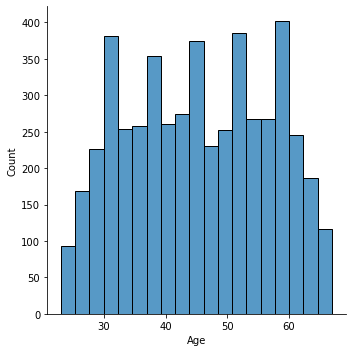

In [11]:
# age distribution 
agedis = sns.displot(data = data, x="Age")

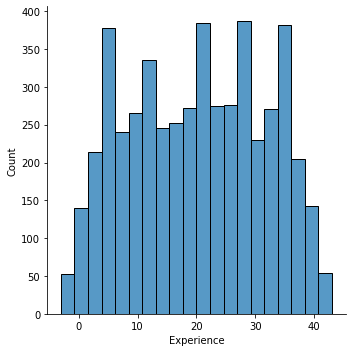

In [12]:
# experience distribution 
Expdis = sns.displot(data = data, x="Experience")

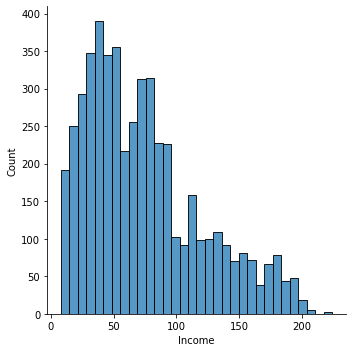

In [13]:
# income distribution 
incomedis = sns.displot(data = data, x="Income")

### Observations:
- Income is right skewed. 
- Most individuals have an annual income less than $100,000.

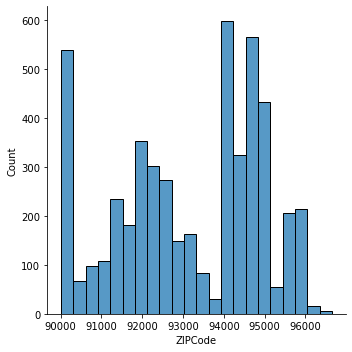

In [14]:
# Zipcode distribution 
zipdis = sns.displot(data = data, x="ZIPCode")

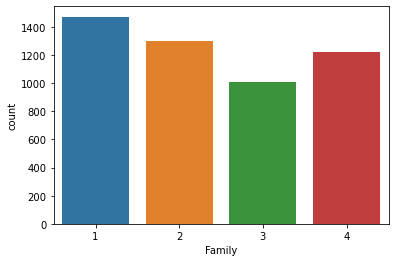

In [15]:
# Family distribution 
famdis = sns.countplot(data = data, x="Family")

### Observations:
- The most common family size is 1. 

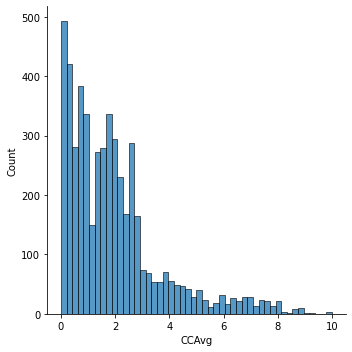

In [16]:
# Credit card average distribution 
ccavgdis = sns.displot(data = data, x="CCAvg")

### Observations:
- Credit card average is right skewed. 
- Majority of customers spend less than $3,000 monthly on their credit card. 

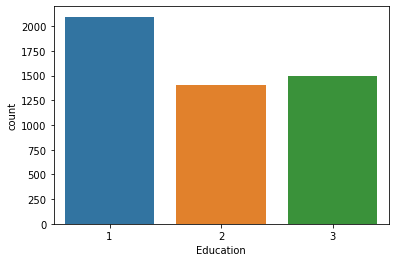

In [17]:
# Education distribution 
edudis = sns.countplot(data = data, x="Education")

### Observations:
- Most customers have earned an undergraduate degree. 

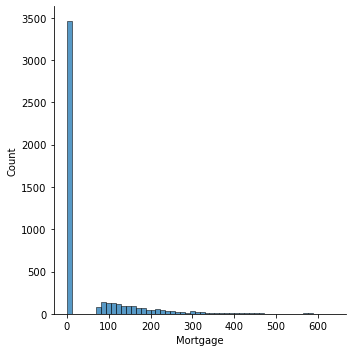

In [18]:
# Mortgage distribution 
mortdis = sns.displot(data = data, x="Mortgage")

### Observations:
- Right skewed. 

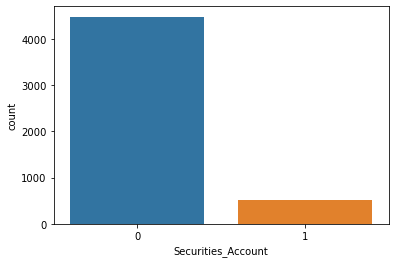

In [19]:
# Securities Account distribution 
secdis = sns.countplot(data = data, x="Securities_Account")

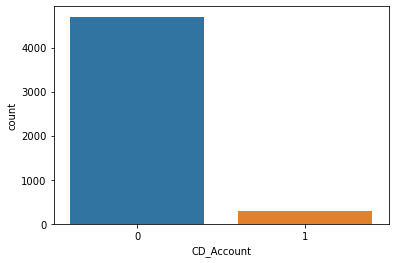

In [20]:
# Certificate of Deposit distribution
cddis = sns.countplot(data = data, x="CD_Account")

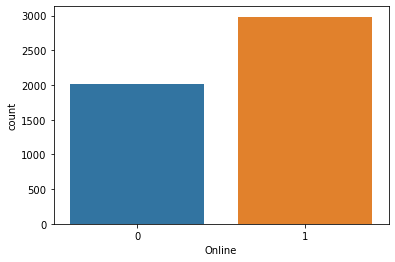

In [21]:
# Online distribution 
onlinedis = sns.countplot(data = data, x="Online")

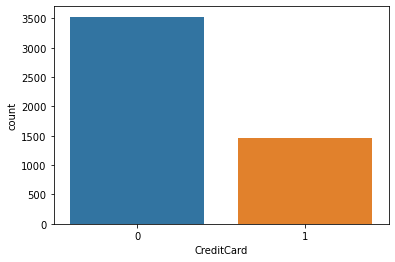

In [22]:
# Credit card distribution 
ccdis = sns.countplot(data = data, x="CreditCard")

2. Categorical features

In [23]:
# Function to create barplots that indicate percentage for each category.


def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

## Family 

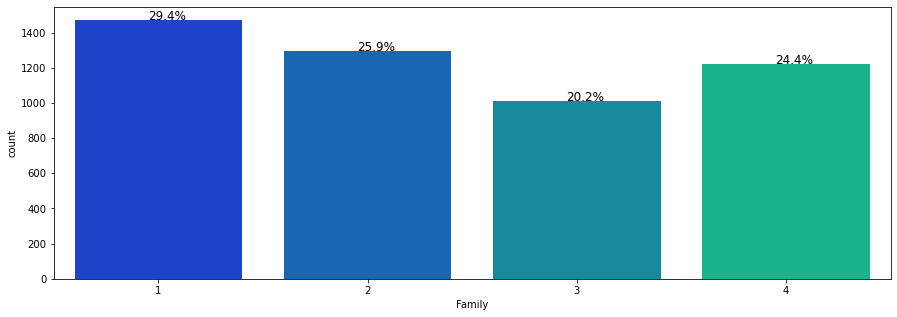

In [24]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    data["Family"],
    palette="winter",
    order=[1, 2, 3, 4],
)
perc_on_bar(ax, data["Family"])

### Observations:
- 29% of the observations have a family size of 1. 

## Education

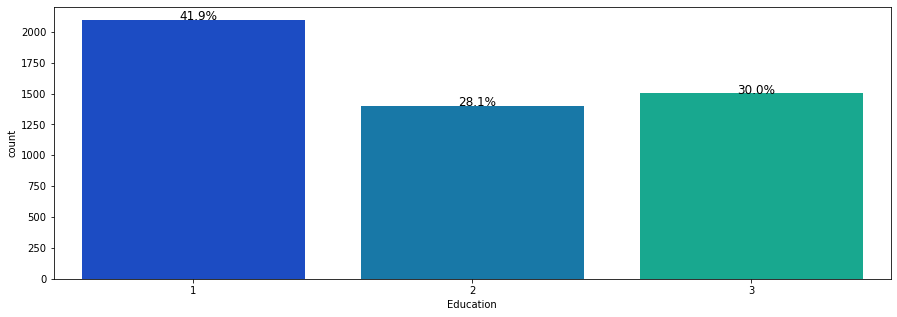

In [25]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    data["Education"],
    palette="winter",
    order=[1, 2, 3],
)
perc_on_bar(ax, data["Education"])

### Observations: 
- 42% of the customers have an undergraduate degree. 


## Securities Account 

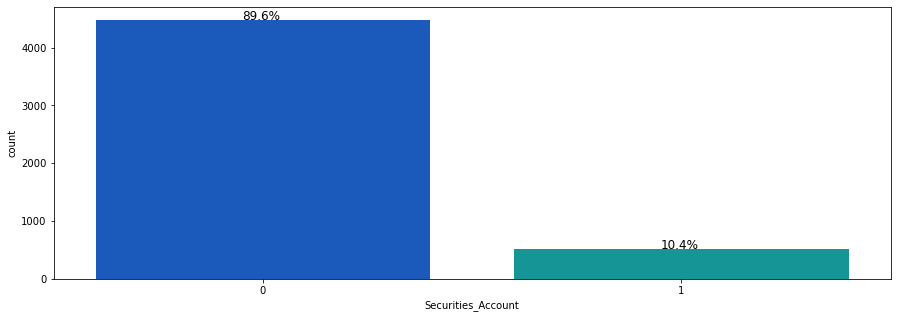

In [26]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    data["Securities_Account"],
    palette="winter",
    order=[0, 1],
)
perc_on_bar(ax, data["Securities_Account"])

### Observations:
- 90% of customers don't have a securities account with the bank. 

## Certificate Deposit Account

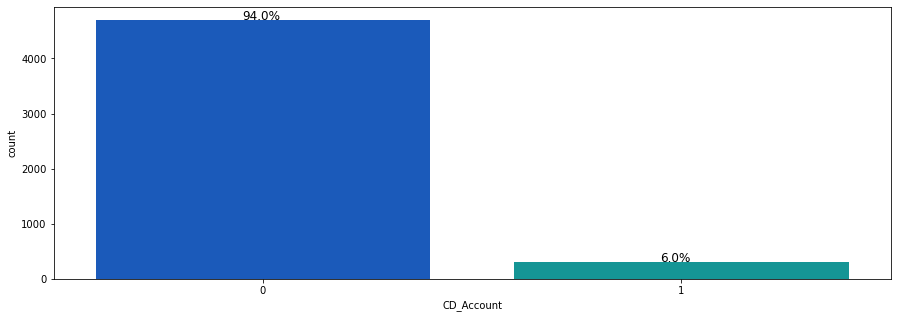

In [27]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    data["CD_Account"],
    palette="winter",
    order=[0, 1],
)
perc_on_bar(ax, data["CD_Account"])

### Observations: 
- 94% of customers don't have a certificate deposit account with the bank. 

## Online

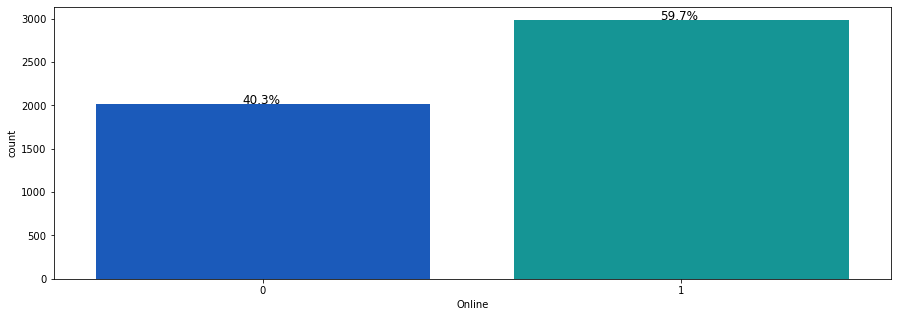

In [28]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    data["Online"],
    palette="winter",
    order=[0, 1],
)
perc_on_bar(ax, data["Online"])

### Observations: 
- 60% of the banks customers use online banking. 

## Credit Card

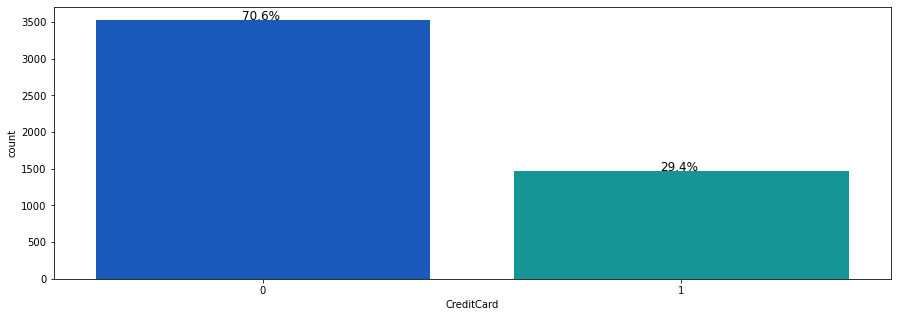

In [29]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    data["CreditCard"],
    palette="winter",
    order=[0, 1],
)
perc_on_bar(ax, data["CreditCard"])

### Observations:
- 71% of the cuustomers don't use a credit card issued from another bank. 

## Personal Loan

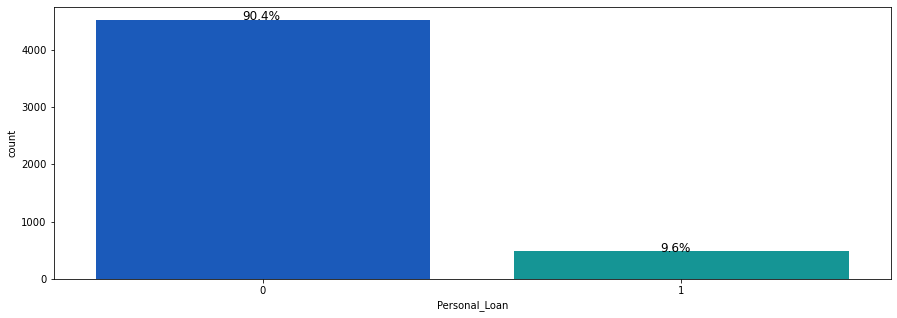

In [30]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    data["Personal_Loan"],
    palette="winter",
    order=[0, 1],
)
perc_on_bar(ax, data["Personal_Loan"])

### Observations:
- 90% of the customers did not accept the previous loan offer. 

## Bivariate Analysis

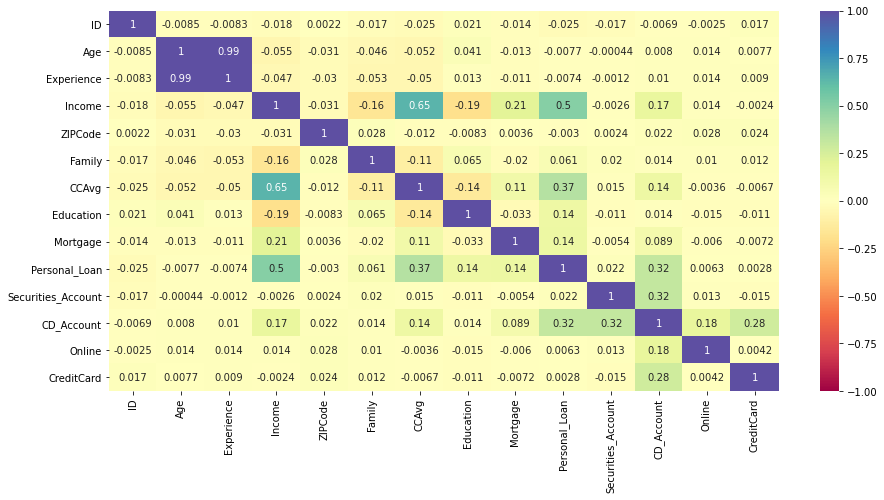

In [31]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

### Observations:
- Personal Loan(target variable) shows highest correlation with Income. 
- The highest correlation is between experience and age(99%). As expected older people have more professional experience. 
- Average spending on credit card each month and income also have a high correlation of 0.65. It is my belief that people with higher income often times have higher avialable usage rates. 

## Personal Loan vs. Income  

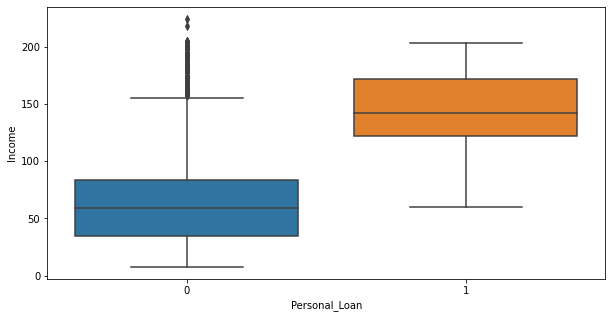

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["Personal_Loan"], data["Income"])
plt.show()

### Observations:
- More people with higher income accepted the previous loan offer. Which makes since seeing as people with higher income are more likely to pay the loan back, and receive more offers. 

## Personal Loan vs. Age

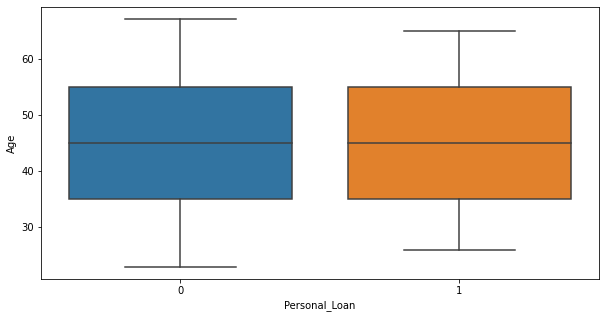

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["Personal_Loan"], data["Age"])
plt.show()

### Observations:
- Their is a poor correlation between Personal Loan and Age.
- Both categories from the target variable have a median of 45 years old.

## Personal Loan vs. Monthly Credit Card Average 

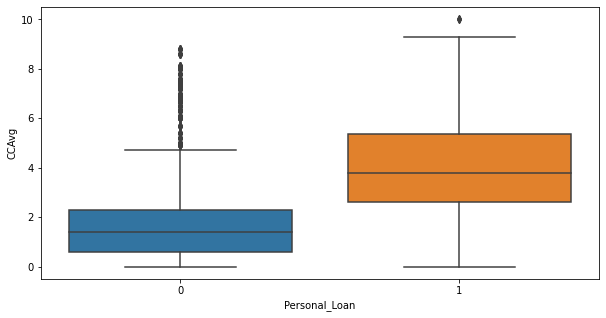

In [34]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["Personal_Loan"], data["CCAvg"])
plt.show()

### Observations: 
- The two variables show some correlation as more individuals with higher monthly credit card spendings have accepted the previous loan offer, however it is not a large correlation. 

## Personal Loan vs. Mortgage Value 

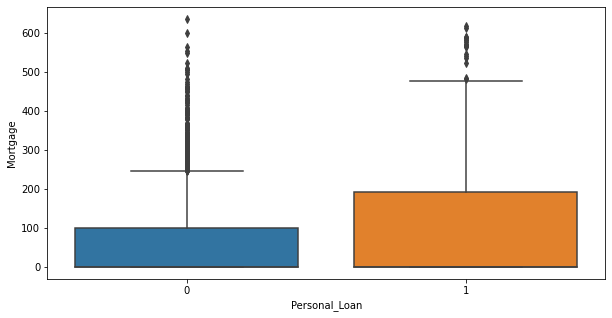

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["Personal_Loan"], data["Mortgage"])
plt.show()

### Observations: 
- The two variables have very little correlation.

## Personal Loan vs. Zipcode

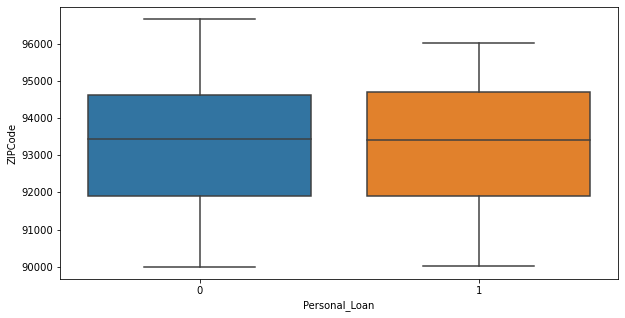

In [36]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["Personal_Loan"], data["ZIPCode"])
plt.show()

### Observations: 
- The boxplot shows no correlation between the two variables.

## Personal Loan vs. Years of Professional Experience 

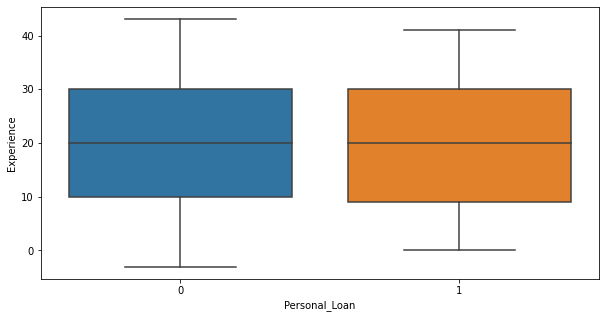

In [37]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["Personal_Loan"], data["Experience"])
plt.show()

### Observations: 
- Their is no correlation between years of professional experience and whether or not an individual accepted the previous loan offers. 


### Categorical Features

In [38]:
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Personal_Loan"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Personal_Loan"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Personal Loan vs. Family

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


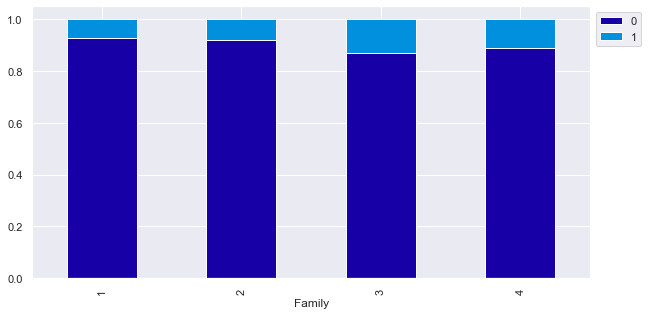

In [39]:
stacked_plot(data["Family"])

### Observations: 
- Individuals with a family size of 4 have accepted the most offers, closely followed by a family size of 3. 
- Their is not a strong correlation between the two variables. 

## Personal Loan vs. Credit Card 

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


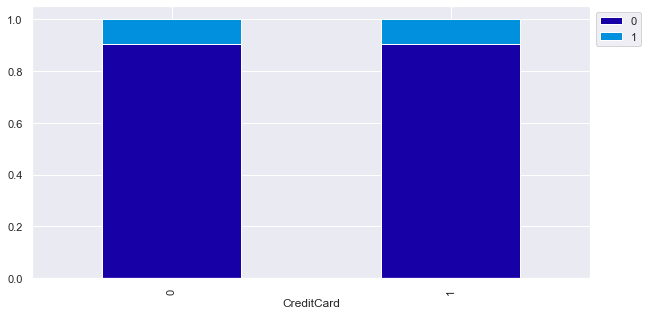

In [40]:
stacked_plot(data["CreditCard"])

### Observations: 
- Their is no correlation between whether or not an individual has a credit card at another bank, and whether or not they accepted the previous loan offer. 

## Personal Loan vs. Online 

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


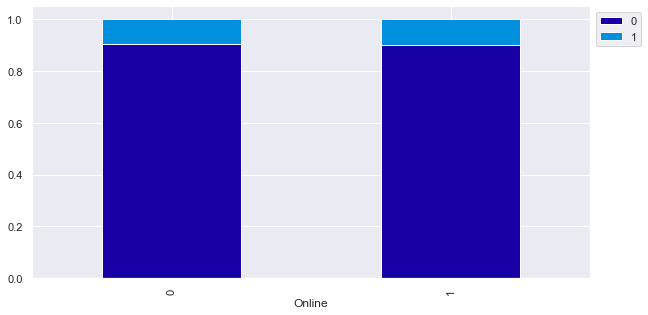

In [41]:
stacked_plot(data["Online"])

### Observations: 
- The bars in the plot show similar data indicating no correlation between the two variables. 

## Personal Loan vs. Certificate of Deposit Account

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


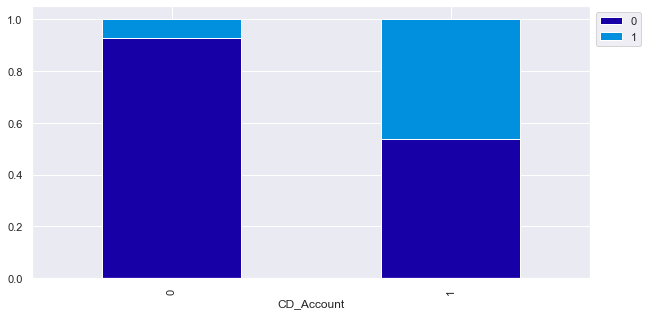

In [42]:
stacked_plot(data["CD_Account"])

### Observations:
- Individuals who have a certificate of deposit account accepted the previous loan offer more often then individuals without a certificate of deposit account. 
- Almost half of the individuals with certificate of deposit accounts accepted the loan offer and half did not. 

## Personal Loan vs. Securities Account

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


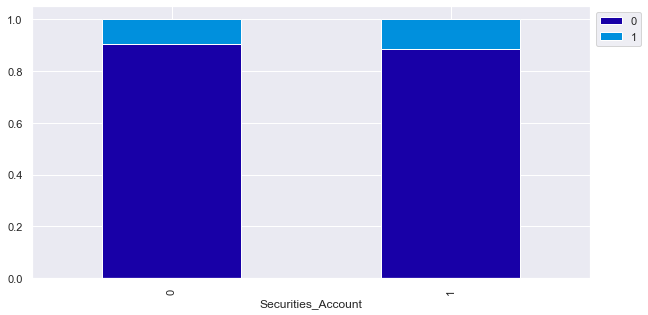

In [43]:
stacked_plot(data["Securities_Account"])

### Observations: 
- Their is no correlation between the two variables. 

## Personal Loan vs. Education

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


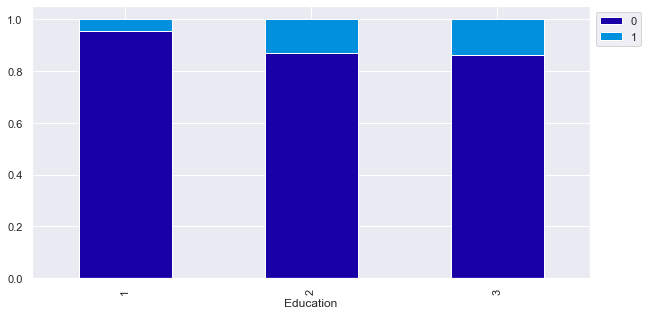

In [44]:
stacked_plot(data["Education"])

### Observations:
- Their is very little correlation between the variables. 
- People with advanced degrees have accepted more loan offers than others. 

## Average credit card spendings and Income analysis 

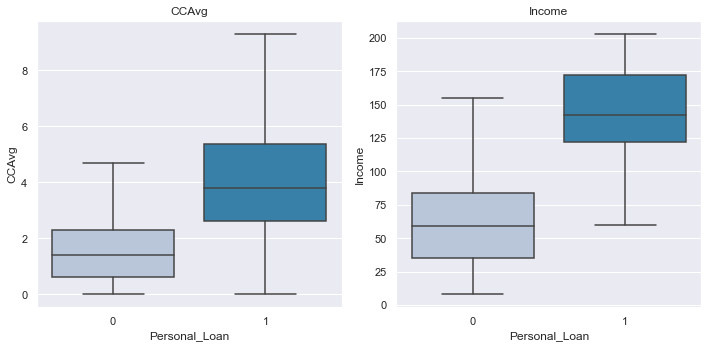

In [45]:
cols = data[['CCAvg','Income']].columns.tolist()
plt.figure(figsize=(10,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,2,i+1)
                     sns.boxplot(data["Personal_Loan"],data[variable],palette="PuBu",showfliers=False)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

### Observations:
- More individuals with higher average monthly credit card spendings, and higher income accepted the previous loan offer. 
- Income has a stronger correlation with personal loan than credit card average. 

## Summary of EDA

### Data description:
- There are no missing values in the dataset. 
- There are no duplicate values in the dataset. 
- All of the data-types are int64 and float64.
- Education and Family are two variables with more than 2 categories, which means I need to create dummy variables for them. 

### Observations of EDA
- Income has the highest correlation with Personal Loan. 
- 25% of individuals who accepted the loan offer also have a average monthly credit card spending greater than 5k. 
- 25% of individuals who accepted the loan offer also have an annual income equal to or great than 173k. 
- Although undergraduate degrees are most common for customers, individuals with an advanced degree accepted the previous loan offer more often than others. 
- 90% of individuals in this dataset did not accept the previous loan offer. 
- Most individuals who have above the average income of $74K accepted the previous loan offer. 
- 60% of customers participate in online banking. 
- Only 6% of customers have a certificate of deposit account. Of that 6%, 46% accepted the previous loan offer. 
 

## Data Pre-processing

1. Creating dummy variables for categories. 
2. No missing or duplicate values to handle. 

## Handling categorical values

In [46]:
# creating dummy varibles
dummy_data = pd.get_dummies(
    data,
    columns=[
        "Family",
        "Education"
    ],
    drop_first=True,
)
dummy_data.head()

,ID,Age,Experience,Income,ZIPCode,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,1,25,1,49,91107,1.6,0,0,1,0,0,0,0,0,1,0,0
1,2,45,19,34,90089,1.5,0,0,1,0,0,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,0,0,0,0,0,0,0,0,0,0,0
3,4,35,9,100,94112,2.7,0,0,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,1.0,0,0,0,0,0,1,0,0,1,1,0


## Model Building Approach 
1. Data preparation
2. Partition the data into train and test set
3. Built a CART (Classification and regression trees) model on the train data
4. Tune the model and prune the tree, if required
5. Test the data on test set

In [47]:
column_names = list(dummy_data.columns)
column_names.remove(
    "Personal_Loan"
)  # Keep only names of features by removing the name of target variable
feature_names = column_names
print(feature_names)

['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3']


## Splitting Data

1. Defining X and y
2. Splitting dataset into training and test

In [48]:
X = dummy_data.drop("Personal_Loan", axis=1)  # Features
y = dummy_data["Personal_Loan"]  # Labels (Target Variable)

In [49]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 16) (1500, 16)


### Observations:
- 30% of the data goes to the test set and the remaining 70% is for the training set. 
- The training set has 3500 rows and 16 columns. 
- The test set has 1500 rows and 16 columns. 

## Building Decision Tree Model

- I will first build a model without hyperparameters using the DecisionTreeClassifier function. 
- After examining the results of model 1, I will build a 2nd model with hyperparameters to help handle any bias created from the data, 
- Then I will build a model using cost complexity parameter to prune the decision tree. 

## Building Model #1 (without hyperparameters)

In [50]:
model = DecisionTreeClassifier(
    criterion="gini",  random_state=1
)

In [51]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [52]:
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth  
    
    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

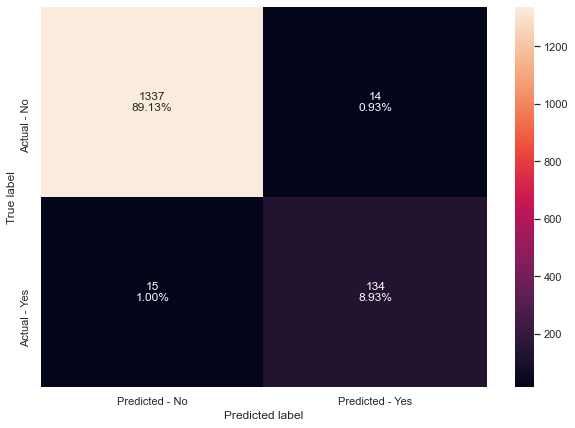

In [53]:
make_confusion_matrix(model, y_test)

In [54]:
y_train.value_counts(1)

0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64

### Observations: 
- Majority of the data is negative, which creates bias results. 
- The number of false negatives is very important in this case, because the bank does not want to overlook potential customers. 
- Recall would be the best measurement. 

In [60]:
##  Function to calculate recall score
def get_recall_score(model):
    """
    model : classifier to predict values of X

    """
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))

In [58]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8993288590604027


### Observation:
- 10% difference between the training and test set. 

### Analyzing possible outcomes:

- **True Positives:**
    - Reality: A customer accepted the loan offer.
    - Model predicted: The customer will accept the loan offer.
    - Outcome: The model is good.

- **True Negatives:**
    - Reality: A customer did NOT accept the loan offer.
    - Model predicted: The customer will NOT accept the loan offer.
    - Outcome: The business is unaffected.

- **False Positives:**
    - Reality: A customer did NOT accept the loan offer.
    - Model predicted: The customer will accept the loan offer.
    - Outcome: The bank which is targeting the potential customers will be wasting their resources on the people/customers who will not be accepting the loan offer.

- **False Negatives:**
    - Reality: A customer accepted the loan offer.
    - Model predicted: The customer will NOT accept the loan offer.
    - Outcome: The potential customer is missed by the sales/marketing team.

## Visualizing the Decision Tree

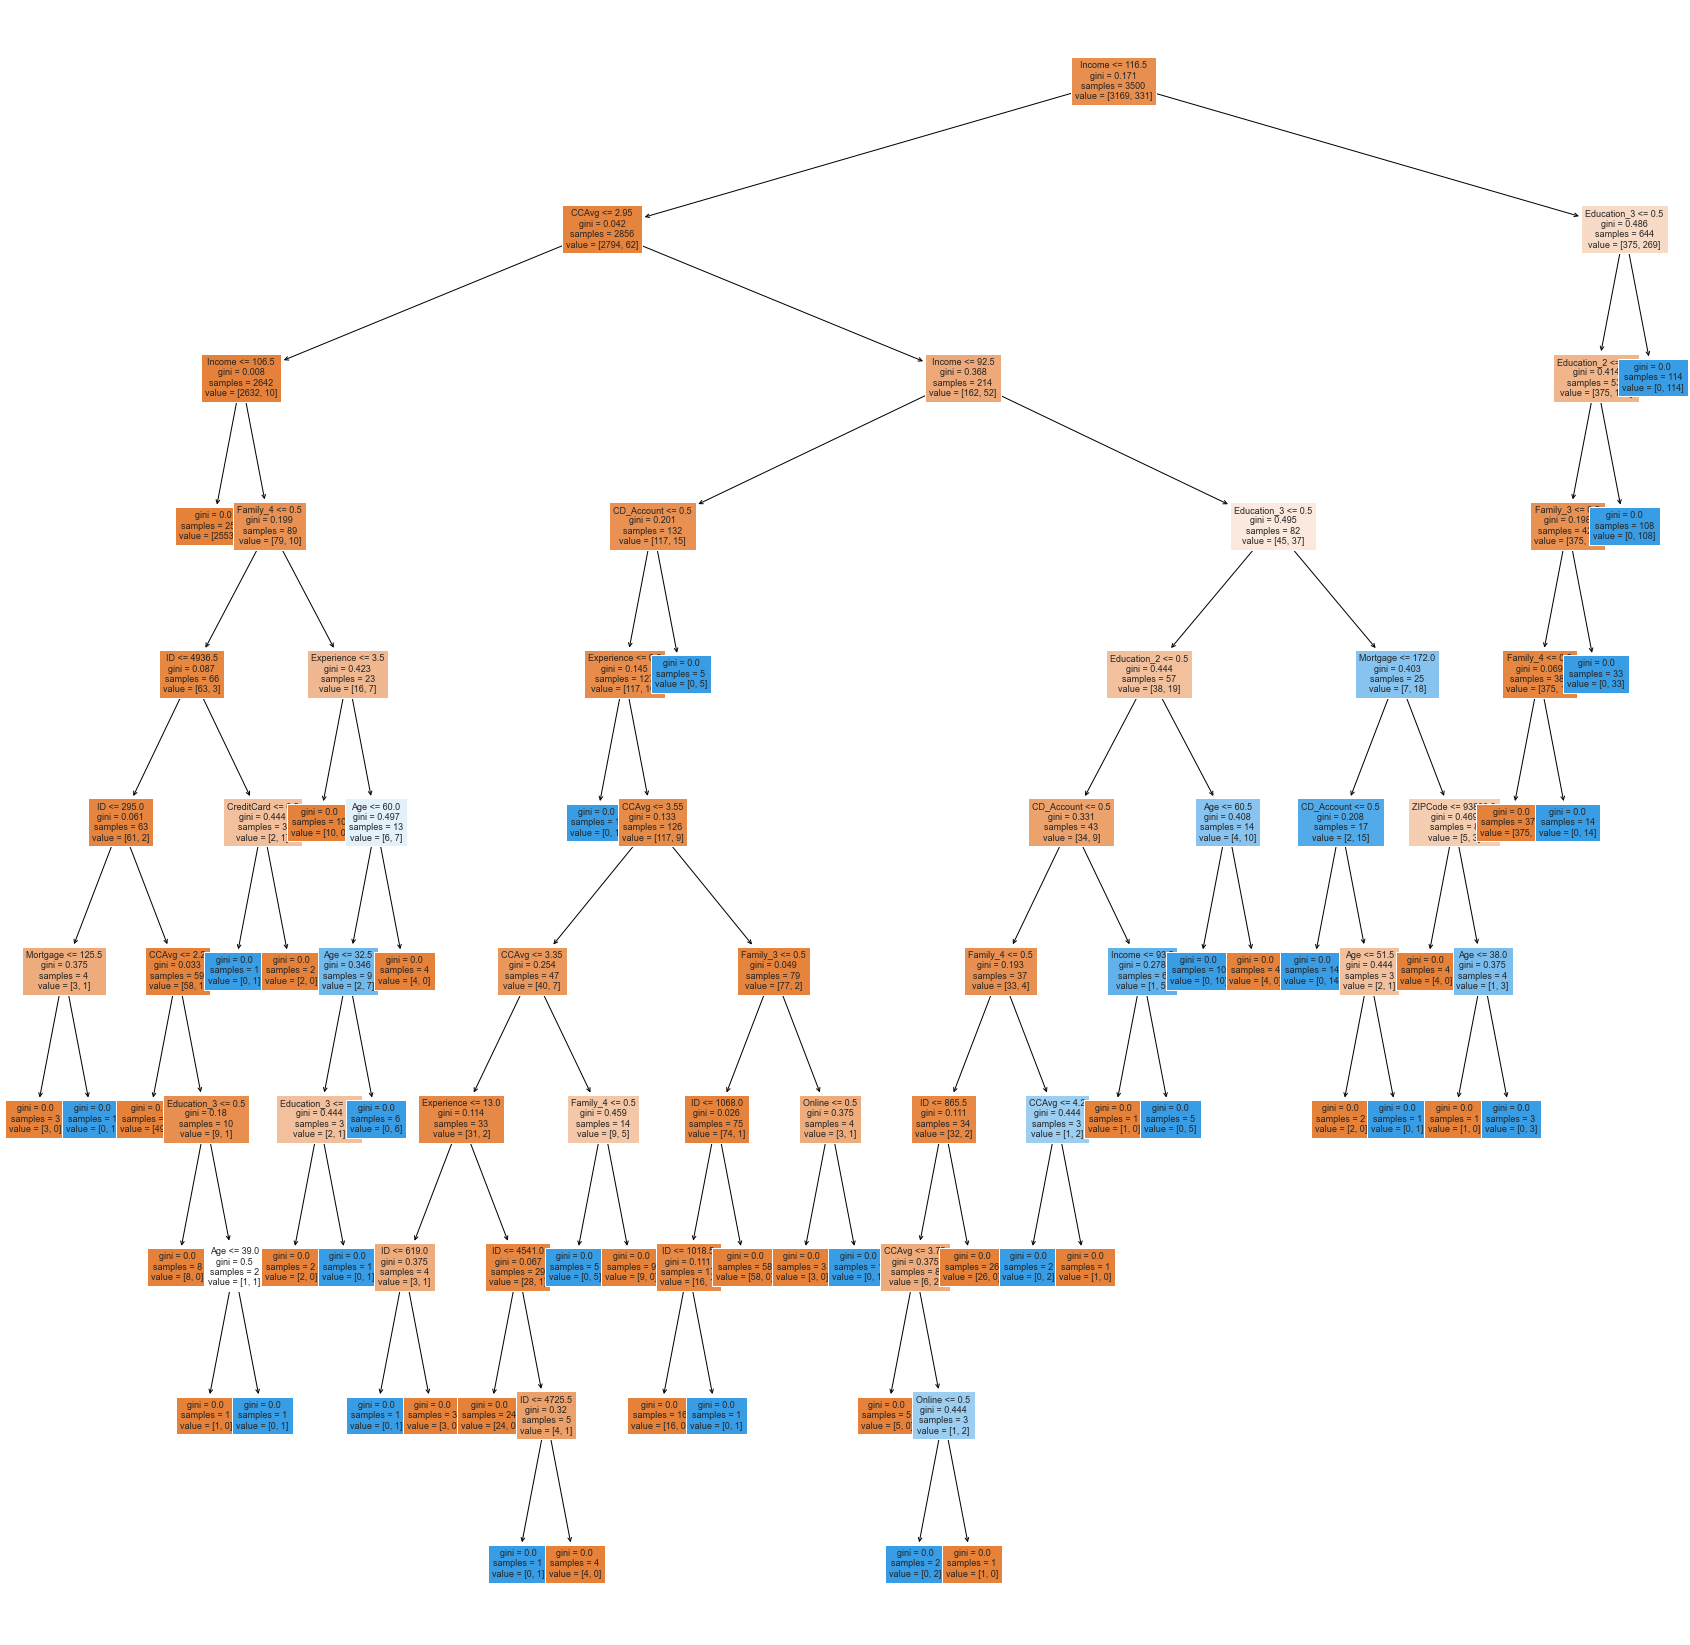

In [65]:
plt.figure(figsize=(30, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [67]:
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- ID <= 4936.50
|   |   |   |   |   |--- ID <= 295.00
|   |   |   |   |   |   |--- Mortgage <= 125.50
|   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |   |--- Mortgage >  125.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- ID >  295.00
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [49.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- Age <= 39.00
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   

In [68]:
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.300597
Education_2         0.235564
Education_3         0.168948
Family_3            0.095036
Family_4            0.062971
CCAvg               0.047465
CD_Account          0.026348
Age                 0.024484
ID                  0.011840
Experience          0.008867
Mortgage            0.007175
Online              0.004727
ZIPCode             0.003754
CreditCard          0.002224
Securities_Account  0.000000
Family_2            0.000000


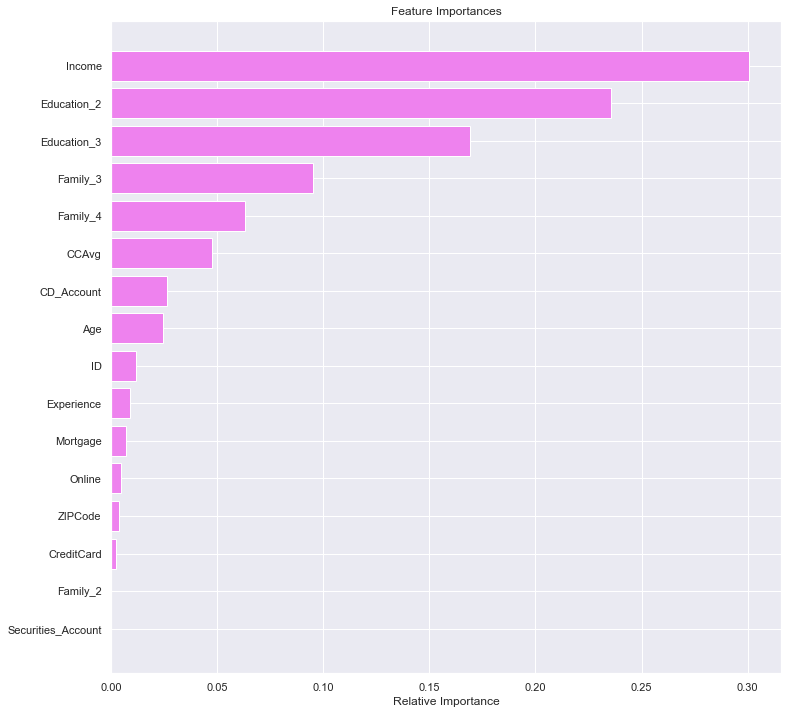

In [69]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observations: 
- The decision tree is very complex, and needs to be pruned. 
- As mentioned before when examining correlations, income is the most important when determining if a customer will accept a loan offer or not. 
- Whether or not someone has a credit card with another bank is the least important feature. 

## Model #2 (using hyperparameters)

- Here we will use GridSearch to help search for the best values as the hyperparameters. 


In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.1, 1: 0.9})

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1, 10),
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
    "max_features": ["log2", "sqrt"],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=2, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1,
                       splitter='random')

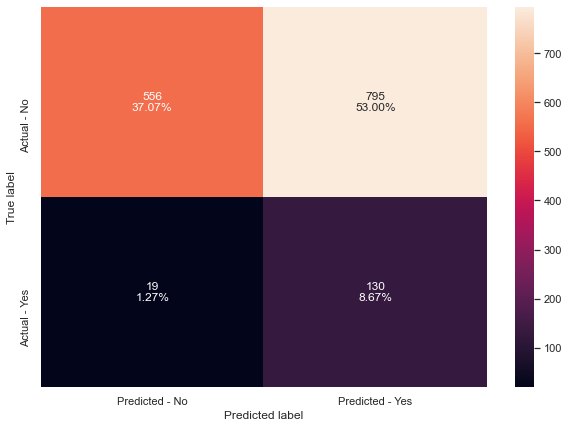

In [72]:
make_confusion_matrix(estimator, y_test)

In [73]:
get_recall_score(estimator)

Recall on training set :  0.9425981873111783
Recall on test set :  0.87248322147651


### Observations:
- The recall score has improved with a 7% difference between the training, and test set. 
- The FALSE NEGATIVE slightly increased. 
- Model can still be improved. 

## Visualizing the Decision Tree

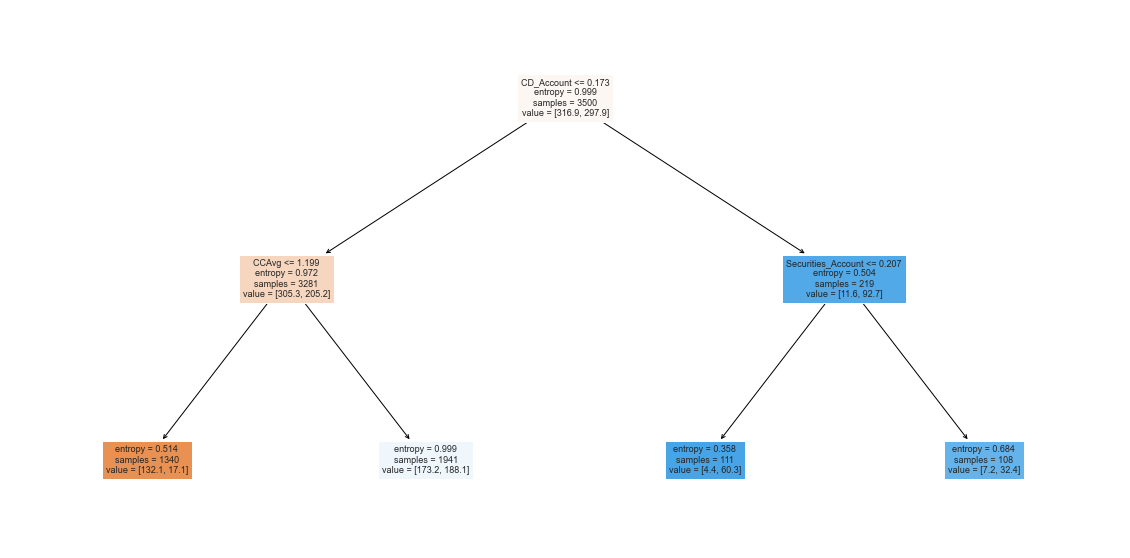

In [74]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [75]:
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
CD_Account          0.518193
CCAvg               0.464080
Securities_Account  0.017727
ID                  0.000000
Age                 0.000000
Experience          0.000000
Income              0.000000
ZIPCode             0.000000
Mortgage            0.000000
Online              0.000000
CreditCard          0.000000
Family_2            0.000000
Family_3            0.000000
Family_4            0.000000
Education_2         0.000000
Education_3         0.000000


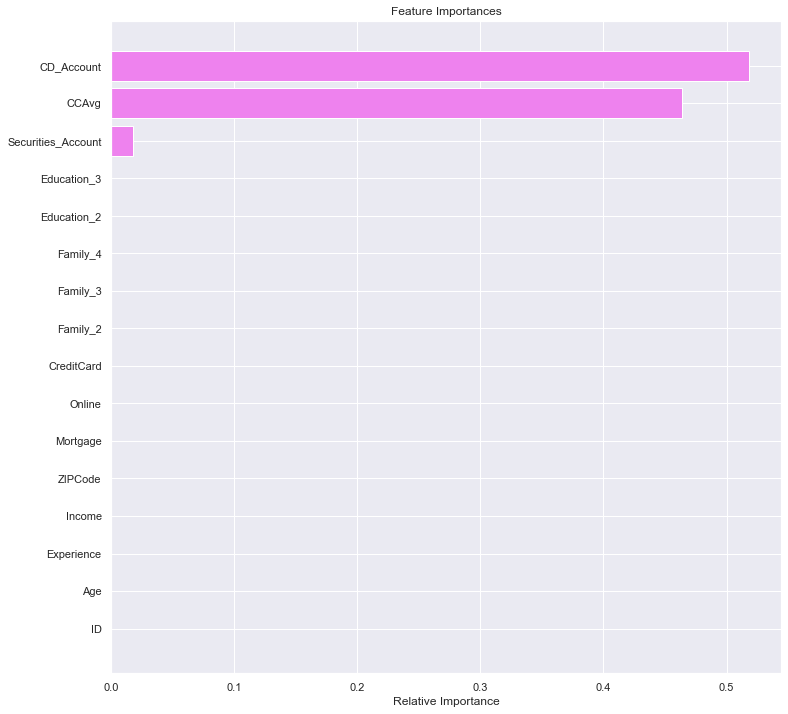

In [76]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Observations:
- The decision tree is less complex with fewer nodes. Seeming to be too simple. 
- The most important feature has changed to certificate of deposit account.
- Income shows to not be important at all when it comes to determing if a customer will accept a loan or not. 
- The model needs to be improved to better help the company. 

## Model #3 (using cost complexity pruning)

- Cost complexity parameter function is ccp_alpha. 
- ccp_alpha is used to help prune or control decision trees. 
- The higher the ccp_aplha the more nodes are pruned. 
- ccp_alpha searches for the weakest node or the node with the smallest effective alpha. 

In [79]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.1, 1: 0.9})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [80]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-6.096475e-16
1,1.805828e-19,-6.094669e-16
2,3.611656e-19,-6.091058e-16
3,3.792239e-19,-6.087265e-16
4,1.011264e-18,-6.077153e-16
5,1.011264e-18,-6.067040e-16
6,2.925441e-18,-6.037786e-16
7,8.704091e-18,-5.950745e-16
8,1.072662e-17,-5.843479e-16
9,1.300196e-17,-5.713459e-16


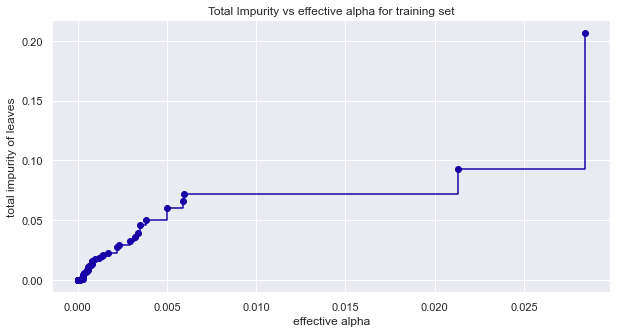

In [81]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

## Train the Decision Tree using the effective alphas

In [1]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.1, 1: 0.9}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

NameError: name 'ccp_alphas' is not defined

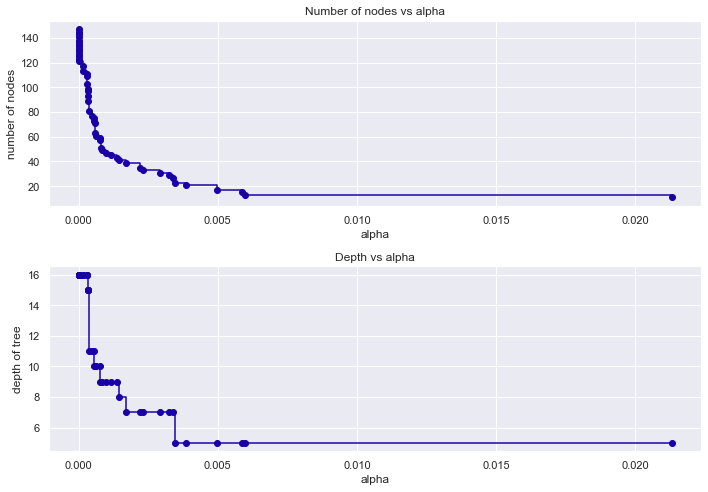

In [94]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [84]:
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

In [85]:
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

In [86]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

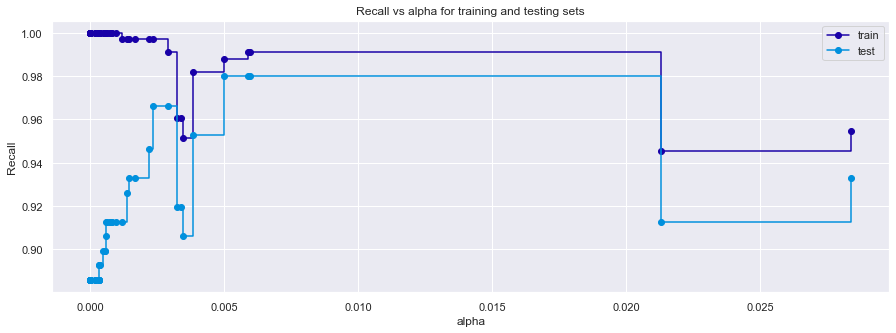

In [87]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [88]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.004980603234981377,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)


In [89]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004980603234981377,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)

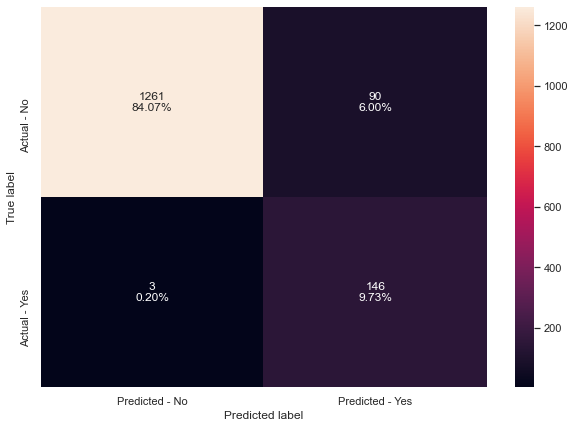

In [91]:
make_confusion_matrix(best_model, y_test)

In [92]:
get_recall_score(best_model)

Recall on training set :  0.9879154078549849
Recall on test set :  0.9798657718120806


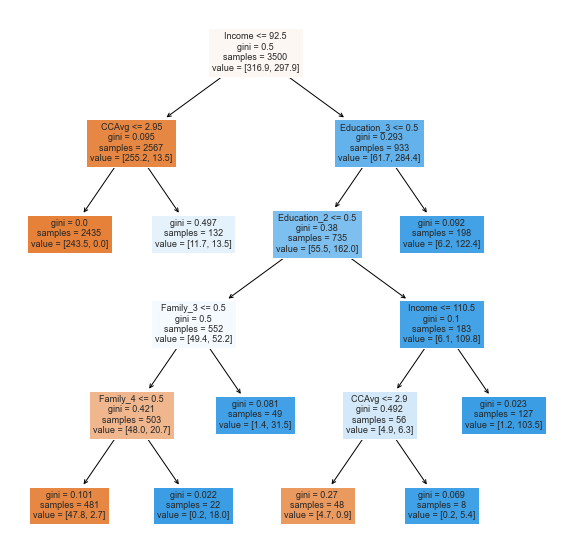

In [93]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [95]:
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.679714
Family_4            0.086636
Education_2         0.075308
Family_3            0.070862
CCAvg               0.061869
Education_3         0.025612
ID                  0.000000
Age                 0.000000
Experience          0.000000
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000
Family_2            0.000000


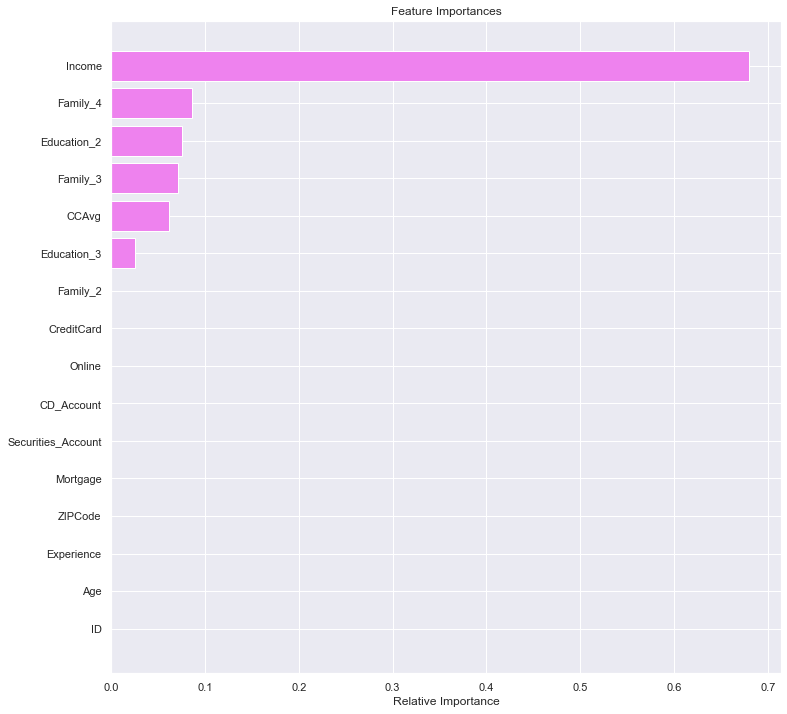

In [96]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observations:
- The recall score has imporved even more with a 1% difference.
- The false negatives have decreased. 
- This is an overall better model. 
- Income has moved back up to the most important feature. 

## Conclusion

1. Model # 3 has the best overall recall out of the three models. 
2. Income has the highest correlation and also shows to be the most important when it comes to predicting the personal loan variable. 
3. Personal loan is the best target variable, because it shows whether or a customer accepted the previous loan offer provided by the bank. (1=yes, 0=no)
4. Majority customers did either didn't receive a loan offer, or didn't accept the offer. 
5. 46% of individuals with certificate of deposit accounts accepted the loan offer. 
6. Model # 3 has the least false negative. 
7. It is in the company's best interest to avoid as many false negative as possible. 

## Citations

1. Dr.DeBary Oct 17 Lecture
2. Dr.DeBary Oct 3 Lecture